# __Regresszió__
Készítette: *Fogarassyné Vathy Ágnes*

Szükséges csomagok beolvasása:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## __1. Egyváltozós lineáris regresszió__

A lineáris regressziószámításról [itt](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) érhető el egy remek Notebook, amely kíválóan foglalja össze a szükséges ismereteket.

Jelen notebookban az egyváltozós lineáris regresszió bemutatásához egy egyszerű adathalmazt használunk, amely azt tartalmazza, hogy egy hallgató mennyi időt töltött a tanulással (*Hours*)) és a zh eredménye hány százalékos lett (*Scores*).

Az adathalmaz kevés mintát tartalmaz, de a bemutatáshoz számunkra most ez is elegendő lesz.

Az egyváltozós lineáris regressziót a **[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** osztály segítségével valósítjuk meg.

**Block 1.1** Adatok beolvasása:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

dataset = pd.read_csv('student_scores.csv')
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Block 1.2** Egy gyors betekintés az adatokba.

In [3]:
# attribútumok alapstatisztikai adatai:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Block 1.3** Adatok vizualizálása:

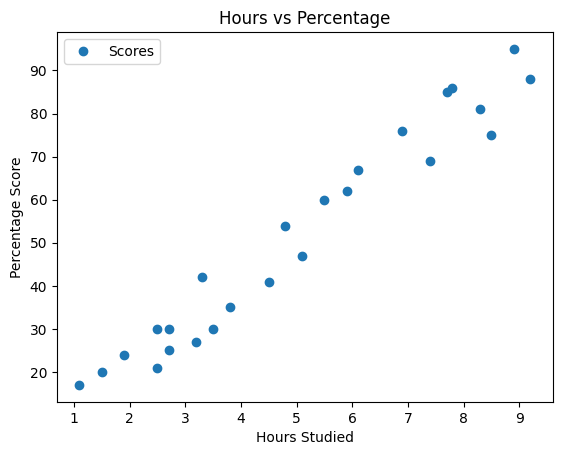

In [4]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Block 1.4** **Adatelőkészítés:** függő és független változók, tréning és teszt halmazok kialakítása

In [5]:
# Függő és független változók:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Test és training adatok létrehozása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Block 1.5** **Modell példányosítása és tanítása**

In [6]:
# Modell létrehozása és illesztése
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Block 1.6** **Az illesztett modell paraméterei:**

In [7]:
print ('b0 értéke:', regressor.intercept_)
print ('b1 értéke:', regressor.coef_)

b0 értéke: 2.0181600414346903
b1 értéke: [9.91065648]


> Értelmezése: minden tanulással töltött óra 9,91 százalékkal/ponttal növeli a zh eredményét.

**Block 1.7** **Előrejelzés** a modell alapján:

In [8]:
# Előrejelzés a teszt halmazon
y_pred = regressor.predict(X_test)

ds_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ds_prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Block 1.8** Modell kirajzolása

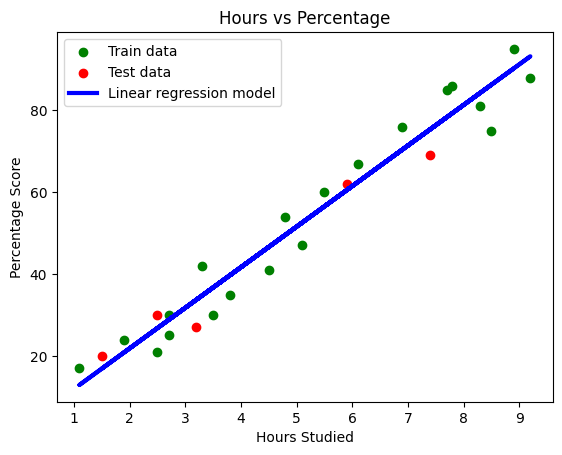

In [9]:
# Plot outputs
plt.scatter(X_train, y_train,  color='green', label='Train data')
plt.scatter(X_test, y_test,  color='red', label='Test data')
plt.plot(X, regressor.predict(X), color='blue', linewidth=3, label='Linear regression model')

plt.legend()

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.show()

**Block 1.9** Az illesztett **modell hibája**

In [10]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)*100

print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Mean Squared Error: {:.4f}'.format(MSE))
print('Root Mean Squared Error: {:.4f}'.format(RMSE))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE))

Mean Absolute Error: 4.1839
Mean Squared Error: 21.5988
Root Mean Squared Error: 4.6474
Mean Absolute Percentage Error: 12.5689%


## **2. Többváltozós lineáris regresszió**

Példa adathalmaz:

Az USA-ban 48 államban megmérték az egy éves benzin fogyasztást. A releváns változók: a benzinadó, az átlagos jövedelem, az aszfaltozott autópálya mérföldjeinek száma, és a vezetői engedéllyel rendelkező lakosság aránya.

Cél: a benzinfogyasztás előrejelzése

Attribútumok:
- Petrol_tax: benzinadó (cent/gallon)
- Average_income: 1 főre eső átlagos jövedelem (dollár);
- Paved_highways: aszfaltozott autópályák hossza (mérföld);
- Population_Driver_licence(%): jogosítványok aránya;
- Petrol_Consumption: benzinfogyasztás (millió gallon)


A többváltozós lineáris regressziót szintén a **[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** osztály segítségével valósítjuk meg.

**Block 2.1** Az adathalmaz beolvasása és egy kis betekintés:

In [11]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [12]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


**Block 2.2** **Adatelőkészítés:** függő és független változók, tréning és teszt halmazok kialakítása:

In [13]:
# Függő és független változók:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

# Test és training adatok létrehozása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Block 2.3** **Modell példányosítása és tanítása:**

In [14]:
# Modell létrehozása és illesztése
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Block 2.4** **Az illesztett modell paraméterei:**

In [15]:
df_coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
df_coeff

,Coefficient
Petrol_tax,-32.003954
Average_income,-0.075188
Paved_Highways,-0.002137
Population_Driver_licence(%),1355.827606


> Értelmezése:

> Az üzemanyag adó (Petrol_tax) egységnyi növekedése esetén 32 millió gallonnal csökken a benzinfogyasztás. A járművezetői engedéllyel rendelkező lakosság arányának egységnyi növekedése 1,355 milliárd liter többlet benzinfogyasztást eredményez. Az átlagos jövedelem (Average_income) és az aszfaltozott útak (Paved_highways) változása nagyon csekély hatással van a benzinfogyasztásra.

**Block 2.5** **Előrejelzés** a modell alapján

In [16]:
# Előrejelzés a teszt halmazon
y_pred = regressor.predict(X_test)

df_prediction_MLR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_prediction_MLR

,Actual,Predicted
33,628,621.250921
23,547,463.618291
38,648,727.431022
36,640,646.094665
2,561,585.209891
3,414,486.869741
31,554,587.673738
26,577,597.031210
44,782,702.923921
27,631,617.312283


**Block 2.6** Az illesztett **modell hibája**

In [17]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)*100

print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Mean Squared Error: {:.4f}'.format(MSE))
print('Root Mean Squared Error: {:.4f}'.format(RMSE))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE))

Mean Absolute Error: 41.9205
Mean Squared Error: 2721.6160
Root Mean Squared Error: 52.1691
Mean Absolute Percentage Error: 7.3276%


> Mint láthatjuk, az átlagos abszolút hiba 41,92, ami az összes állam átlagos fogyasztásának (576,77) a 7,2%-a. A hiba nem kicsi, de talán még elfogadható. Ugyanez az RMSE-re vetítve 9,0%.

> Mi okozhatja a hibát?
- Feltételeztük a lineáris összefüggést. Tényleg igaz?
- Kevés a megfigyelt adat (csak 1 évnyi). Több évnyi adat pontosabban mutatná az összefüggéseket.
- Lehet nem is ezek a független változók jelzik előre a benzinfogyasztást...

## __3. Lasso, Ridge, Elastic Net__

### **3.1 Lasso regresszió**

A Lasso regressziót a **[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)** osztály segítségével valósítjuk meg.

Az osztály fontosabb paraméterei:
   * *alpha*: a regularizáció erősségét befolyásoló konstans a [0,1] tartományból. 0 érték esetén nincs regularizáció. Ez esetben azonban számítási okoból a *LinearRegression* használata ajánlott.
   * *max_iter*: a megoldó (gradient solver) maximális iterációszáma

Az osztály fontosabb attribútumai:
   * *coef_*: a becsült paraméterek vektora

**Block 3.1** Illesszünk a benzinfogyasztás adatokra Lasso regularizációt tartalmazó lineáris regressziós hipersíkot!

In [18]:
# új modell létrehozása és illesztése
regressor_Lasso = Lasso(alpha=0.1)
regressor_Lasso.fit(X_train, y_train)

# együtthatók mentése:
df_coeff['Coefficient_Lasso'] = regressor_Lasso.coef_

# Előrejelzés a teszt halmazon
y_pred_Lasso = regressor_Lasso.predict(X_test)

# Az előrejelzés adatainak kimentése DataFrame-be későbbi felhasználás céljából
df_prediction_MLR['Predicted_Lasso'] = y_pred_Lasso

# Az illesztés hibájának számítása
MAE_Lasso = metrics.mean_absolute_error(y_test, y_pred_Lasso)
MSE_Lasso = metrics.mean_squared_error(y_test, y_pred_Lasso)
RMSE_Lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso))
MAPE_Lasso = metrics.mean_absolute_percentage_error(y_test, y_pred_Lasso)*100

print('Mean Absolute Error: {:.4f}'.format(MAE_Lasso))
print('Mean Squared Error: {:.4f}'.format(MSE_Lasso))
print('Root Mean Squared Error: {:.4f}'.format(RMSE_Lasso))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE_Lasso))

Mean Absolute Error: 41.9143
Mean Squared Error: 2702.3072
Root Mean Squared Error: 51.9837
Mean Absolute Percentage Error: 7.3489%


### **3.2 Ridge regresszió**

A Ridge regressziót a **[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)** osztály segítségével valósítjuk meg.

Az osztály paraméterei és attribútumai nagy hasonlóságot mutatnak a Lasso regresszió paramétereivel.

**Block 3.2** Illesszünk a benzinfogyasztás adatokra Lasso regularizációt tartalmazó lineáris regressziós hipersíkot!

In [19]:
# új modell létrehozása és illesztése
regressor_Ridge = Ridge(alpha=0.1)
regressor_Ridge.fit(X_train, y_train)

# együtthatók mentése:
df_coeff['Coefficient_Ridge'] = regressor_Ridge.coef_

# Előrejelzés a teszt halmazon
y_pred_Ridge = regressor_Ridge.predict(X_test)

# Az előrejelzés adatainak kimentése DataFrame-be későbbi felhasználás céljából
df_prediction_MLR['Predicted_Ridge'] = y_pred_Ridge

# Az illesztés hibájának számítása
MAE_Ridge = metrics.mean_absolute_error(y_test, y_pred_Ridge)
MSE_Ridge = metrics.mean_squared_error(y_test, y_pred_Ridge)
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge))
MAPE_Ridge = metrics.mean_absolute_percentage_error(y_test, y_pred_Ridge)*100

print('Mean Absolute Error: {:.4f}'.format(MAE_Ridge))
print('Mean Squared Error: {:.4f}'.format(MSE_Ridge))
print('Root Mean Squared Error: {:.4f}'.format(RMSE_Ridge))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE_Ridge))

Mean Absolute Error: 44.4187
Mean Squared Error: 3579.2679
Root Mean Squared Error: 59.8270
Mean Absolute Percentage Error: 8.1763%


### **3.3 Elastic Net**


Elastic Net regressziót a **[ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)** osztály segítségével valósítjuk meg.

Az osztály paraméterei és attribútumai nagy hasonlóságot mutatnak a Lasso és Ridge regresszió paramétereivel, de van egy új paramétere is:
   * *l1_ratio:* [0,1] közti érték, ami a Lasso és a Ridge regresszió közti megosztást szabályozza. l1_ratio=0 esetén csak L2 regularizáció van, l1_ratio=1 esetén csak L1 ragularizáció van, egyéb esetben pedig az aránynak megfelelően a kettő kombinációja

**Block 3.3** Illesszünk a benzinfogyasztás adatokra ElasticNet regularizációt tartalmazó lineáris regressziós hipersíkot!

In [20]:
# új modell létrehozása és illesztése
regressor_ElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)
regressor_ElasticNet.fit(X_train, y_train)

# együtthatók mentése:
df_coeff['Coefficient_ElasticNet'] = regressor_ElasticNet.coef_

# Előrejelzés a teszt halmazon
y_pred_ElasticNet = regressor_ElasticNet.predict(X_test)

# Az előrejelzés adatainak kimentése DataFrame-be későbbi felhasználás céljából
df_prediction_MLR['Predicted_ElasticNet'] = y_pred_ElasticNet

# Az illesztés hibájának számítása
MAE_ElasticNet = metrics.mean_absolute_error(y_test, y_pred_ElasticNet)
MSE_ElasticNet = metrics.mean_squared_error(y_test, y_pred_ElasticNet)
RMSE_ElasticNet = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ElasticNet))
MAPE_ElasticNet = metrics.mean_absolute_percentage_error(y_test, y_pred_ElasticNet)*100

print('Mean Absolute Error: {:.4f}'.format(MAE_ElasticNet))
print('Mean Squared Error: {:.4f}'.format(MSE_ElasticNet))
print('Root Mean Squared Error: {:.4f}'.format(RMSE_ElasticNet))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE_ElasticNet))

Mean Absolute Error: 63.7567
Mean Squared Error: 6240.2248
Root Mean Squared Error: 78.9951
Mean Absolute Percentage Error: 11.5468%


### **3.4 Regularizált modellek összehasonlítása**

**Block 3.4** Írassuk ki a *df_coeff* DataFrame-t, melybe folyamatosan lementettük a különféle regularizációs modellek együtthatóit!

In [21]:
df_coeff

,Coefficient,Coefficient_Lasso,Coefficient_Ridge,Coefficient_ElasticNet
Petrol_tax,-32.003954,-33.081304,-54.088732,-67.054188
Average_income,-0.075188,-0.074359,-0.059598,-0.048109
Paved_Highways,-0.002137,-0.002309,-0.005585,-0.007744
Population_Driver_licence(%),1355.827606,1316.398594,655.322721,64.580098


**Block 3.5** A valós adatok összehasonlítás a különféle regularizációs modellek előrejelzéseivel (korábbi mentés alapján a *df_prediction_MLR* DataFrame alapján):

In [22]:
df_prediction_MLR

,Actual,Predicted,Predicted_Lasso,Predicted_Ridge,Predicted_ElasticNet
33,628,621.250921,621.841422,632.100334,640.572000
23,547,463.618291,464.425567,474.454000,490.331875
38,648,727.431022,722.746744,642.191507,574.193736
36,640,646.094665,646.848447,662.469264,670.548358
2,561,585.209891,583.740838,556.475755,537.312838
3,414,486.869741,489.729344,540.018583,580.327009
31,554,587.673738,589.697917,624.481676,653.907738
26,577,597.031210,596.899087,593.149874,592.835076
44,782,702.923921,702.055738,694.575171,673.925074
27,631,617.312283,616.196244,596.335902,580.859213


**Block 3.6** A különféle regularizációs modellek hibái:

In [23]:
df_errors = pd.DataFrame([['Simple', MAE, MSE, RMSE, MAPE],
                          ['Lasso', MAE_Lasso, MSE_Lasso, RMSE_Lasso, MAPE_Lasso],
                          ['Ridge', MAE_Ridge, MSE_Ridge, RMSE_Ridge, MAPE_Ridge],
                          ['Elastic Net', MAE_ElasticNet, MSE_ElasticNet, RMSE_ElasticNet, MAPE_ElasticNet]],
                         columns=(['Method', 'MAE', 'MSE', 'RMSE', 'MAPE']))
df_errors

,Method,MAE,MSE,RMSE,MAPE
0,Simple,41.920485,2721.615957,52.169109,7.327634
1,Lasso,41.914340,2702.307236,51.983721,7.348885
2,Ridge,44.418740,3579.267869,59.826983,8.176280
3,Elastic Net,63.756745,6240.224783,78.995093,11.546750


## __4. ML regresszorok__

Számos osztályozásból ismert modellnek létezik regressziós változata is. Ezek közül a következőkben most csak egy egyszerű Döntési fa regresszorra nézünk példát, de analóg módon a többi is elkészíthető...

### __4.1 Decision Tree Regressor__


**Block 4.1** A Döntési fa regresszor hiperparaméter-hangolása, a regresszor illesztése, valamint az illesztett modell hibáinka számítása:

In [24]:
from sklearn.model_selection import GridSearchCV

# A modell hangolása és illesztése
regressor_DT = DecisionTreeRegressor()

params = {
    'max_depth' : range(1,8),
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,10)
}

gridsearch = GridSearchCV(
    estimator = regressor_DT,
    param_grid = params,
    scoring = 'neg_mean_absolute_percentage_error',
    cv = 5,
    n_jobs = -1,
    verbose = 0
)

grid_results = gridsearch.fit(X_train, y_train)

# Előrejelzés a teszt halmazon
y_pred_DT = grid_results.best_estimator_.predict(X_test)

# Az illesztés hibájának számítása
MAE_DT = metrics.mean_absolute_error(y_test, y_pred_DT)
MSE_DT = metrics.mean_squared_error(y_test, y_pred_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
MAPE_DT = metrics.mean_absolute_percentage_error(y_test, y_pred_DT)*100

print('\nA hiperparaméter-hangolás eredménye: ', grid_results.best_params_)

print('Mean Absolute Error: {:.4f}'.format(MAE_DT))
print('Mean Squared Error: {:.4f}'.format(MSE_DT))
print('Root Mean Squared Error: {:.4f}'.format(RMSE_DT))
print('Mean Absolute Percentage Error: {:.4f}%'.format(MAPE_DT))


A hiperparaméter-hangolás eredménye:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Absolute Error: 47.9533
Mean Squared Error: 3308.4475
Root Mean Squared Error: 57.5191
Mean Absolute Percentage Error: 7.9023%


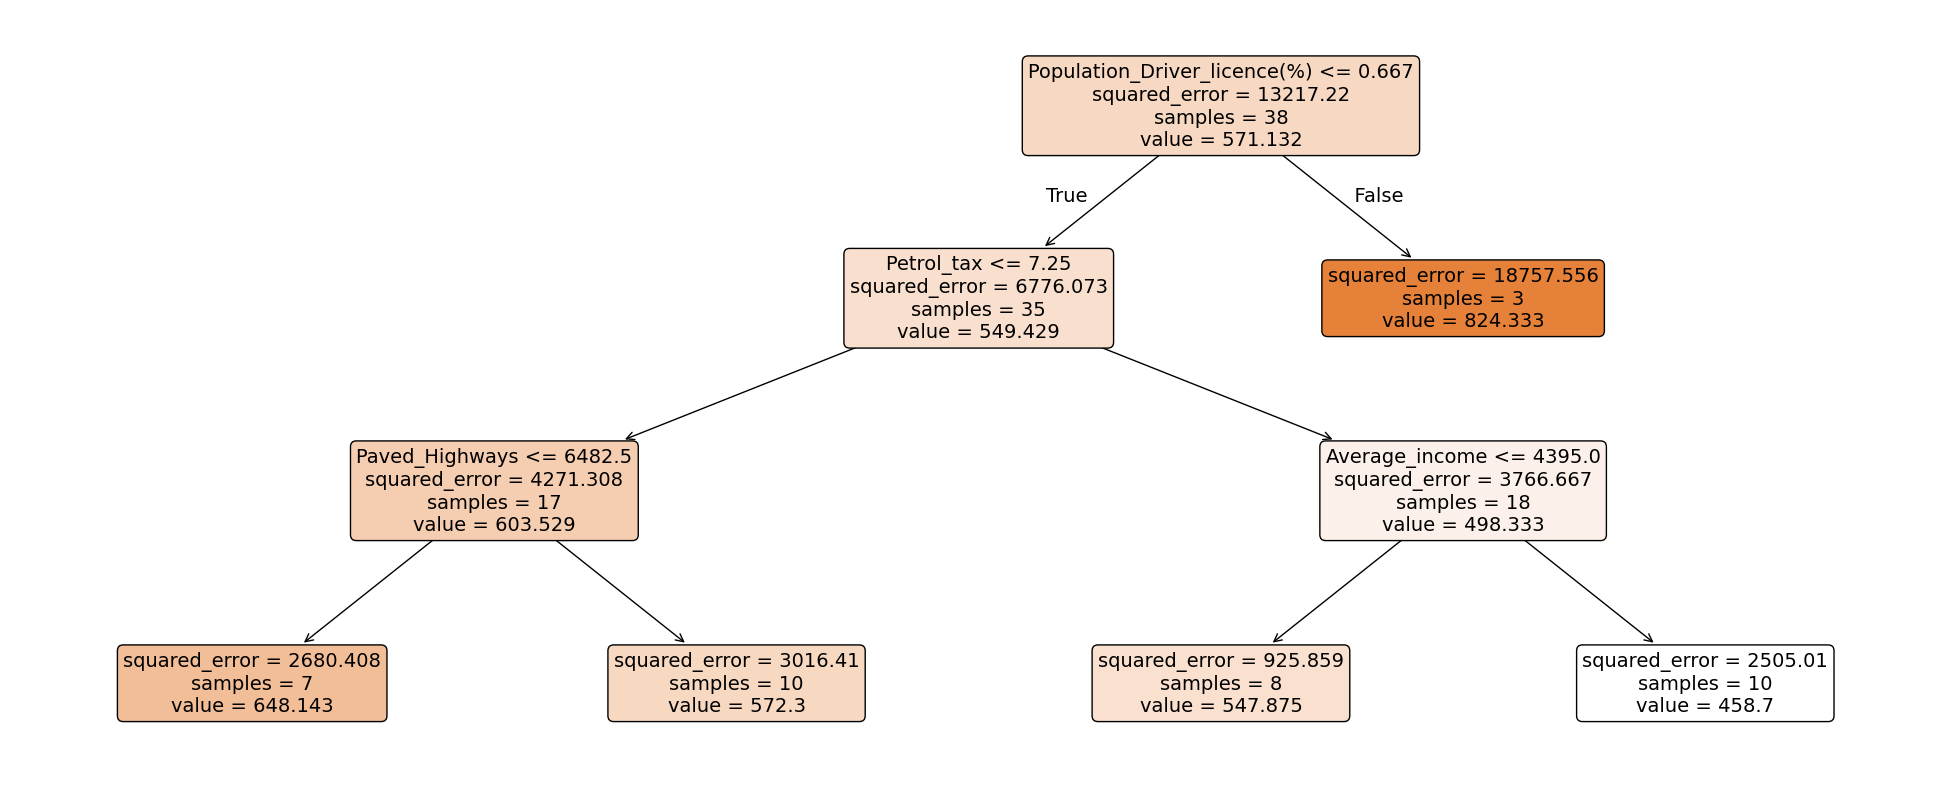

In [25]:
plt.figure(figsize=(25,10))
a = plot_tree(grid_results.best_estimator_,
              feature_names=X.columns,
              class_names=y,
              filled=True,
              rounded=True,
              fontsize=14)